# 출루율 기준 최고의 타자

In [3]:
import pandas as pd

file = './data/KBO_2019_player_gamestats.csv'

raw = pd.read_csv(file, encoding = 'cp949')

In [4]:
raw.head()

,팀,이름,생일,일자,상대,결과,타순,P,선발,타수,...,희타,희비,타율,출루,장타,OPS,투구,avLI,RE24,WPA
0,두산,페르난데스,1988-04-27,03-23,한화,W 5:4,6,DH,1,4,...,0,0,0.500,0.500,0.750,1.250,19,1.98,1.65,0.429
1,두산,페르난데스,1988-04-27,03-24,한화,L 1:11,6,DH,1,2,...,0,0,0.333,0.333,0.500,0.833,4,0.77,-0.36,-0.038
2,두산,페르난데스,1988-04-27,03-26,키움,W 7:2,2,DH,1,2,...,0,0,0.250,0.400,0.375,0.775,16,1.56,0.98,0.146
3,두산,페르난데스,1988-04-27,03-27,키움,W 3:2,2,DH,1,4,...,0,0,0.417,0.500,0.500,1.000,11,1.53,1.29,0.189
4,두산,페르난데스,1988-04-27,03-28,키움,L 4:5,2,DH,1,3,...,0,0,0.333,0.474,0.400,0.874,23,2.04,-0.30,-0.166


In [28]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15311 entries, 0 to 15310
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   팀       15311 non-null  object 
 1   이름      15311 non-null  object 
 2   생일      15311 non-null  object 
 3   일자      15311 non-null  object 
 4   상대      15311 non-null  object 
 5   결과      15311 non-null  object 
 6   타순      15311 non-null  int64  
 7   P       15311 non-null  object 
 8   선발      15311 non-null  int64  
 9   타수      15311 non-null  int64  
 10  득점      15311 non-null  int64  
 11  안타      15311 non-null  int64  
 12  2타      15311 non-null  int64  
 13  3타      15311 non-null  int64  
 14  홈런      15311 non-null  int64  
 15  루타      15311 non-null  int64  
 16  타점      15311 non-null  int64  
 17  도루      15311 non-null  int64  
 18  도실      15311 non-null  int64  
 19  볼넷      15311 non-null  int64  
 20  사구      15311 non-null  int64  
 21  고4      15311 non-null  int64  
 22

In [29]:
raw.columns


Index(['팀', '이름', '생일', '일자', '상대', '결과', '타순', 'P', '선발', '타수', '득점', '안타',
       '2타', '3타', '홈런', '루타', '타점', '도루', '도실', '볼넷', '사구', '고4', '삼진', '병살',
       '희타', '희비', '타율', '출루', '장타', 'OPS', '투구', 'avLI', 'RE24', 'WPA'],
      dtype='object')

In [9]:
#필요한 데이터 선택
raw.columns

columns_select = ['팀', '이름', '생일','일자', '상대','타수','안타', '홈런', '루타', '타점','볼넷', '사구','희비' ]
data = raw[columns_select]

In [19]:
# 선수들 주요 기록 정리

data_player =data.pivot_table(index = ['팀', '이름', '생일'],
                values = ['타수','안타', '홈런', '루타', '타점','볼넷', '사구','희비'],
                aggfunc = 'sum')

data_player

루타  볼넷  사구   안타   타수  타점  홈런  희비
팀   이름  생일                                           
KIA 고영창 1989-02-24    0   0   0    0    0   0   0   0
    김선빈 1989-12-18  146  43   1  115  394  40   3   4
    김세현 1987-08-07    0   0   0    0    0   0   0   0
    김주찬 1981-03-25  126  17   5  101  337  32   3   3
    나지완 1985-05-19   47  19   3   24  129  17   6   2
...                 ...  ..  ..  ...  ...  ..  ..  ..
한화  최윤석 1987-03-28    3   3   0    3   12   1   0   0
    최재훈 1989-08-27  135  56  14  108  373  31   3   4
    최진행 1985-08-17   51   9   2   27  117  19   6   1
    하주석 1994-02-25    7   0   0    5   19   2   0   0
    호잉  1989-05-18  219  38   5  135  476  73  18   5

[285 rows x 8 columns]

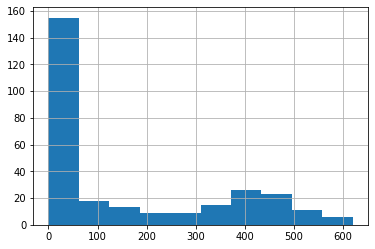

In [21]:
# 400타석 이상 충족 타자 선정

data_player['타수'].hist()

In [37]:
# 400타석 이상 충족 타자 선정
cond = data_player['타수'] > 400
data_player = data_player[cond].reset_index()

In [38]:
# 타/출/장/OPS 계산하는 함수
# 타율 = 안타 / 타수
# 출루율 = (안타+볼넷+사구)/(타수+볼넷+사구+희비)
# 장타율 = 루타 / 타수
# OPS = 출 + 장

def cal_hit(df):
    df['타율'] = df['안타'] / df['타수']
    df['출루율'] = (df['안타']+df['볼넷']+df['사구']) / (df['타수']+df['볼넷']+df['사구']+df['희비'])
    df['장타율'] = df['루타'] / df['타수']
    df['OPS'] = df['출루율'] + df['장타율']
    
    return df
    

In [42]:
player_stat = cal_hit(data_player)
cal_hit(data_player).head(10)

,index,팀,이름,생일,루타,볼넷,사구,안타,타수,타점,홈런,희비,타율,출루율,장타율,OPS
0,0,KIA,박찬호,1995-06-05,160,26,4,131,504,49,2,2,0.259921,0.300373,0.317460,0.617833
1,1,KIA,최형우,1983-12-16,221,85,7,137,456,86,17,7,0.300439,0.412613,0.484649,0.897262
2,2,KT,김민혁,1995-11-21,143,32,13,131,466,32,0,5,0.281116,0.341085,0.306867,0.647952
3,3,KT,로하스,1990-05-24,276,49,3,168,521,104,24,5,0.322457,0.380623,0.529750,0.910373
4,4,KT,유한준,1981-07-01,222,52,4,159,501,86,14,5,0.317365,0.382562,0.443114,0.825676
5,5,KT,황재균,1987-07-28,209,52,2,127,448,67,20,5,0.283482,0.357002,0.466518,0.823520
6,6,LG,김현수,1988-01-12,234,55,6,164,547,84,11,9,0.299817,0.364668,0.427788,0.792456
7,7,LG,오지환,1990-03-12,180,58,7,120,477,55,9,5,0.251572,0.338208,0.377358,0.715567
8,8,LG,이천웅,1988-10-20,211,60,5,175,566,50,2,1,0.309187,0.379747,0.372792,0.752538
9,9,LG,채은성,1990-02-06,213,27,12,154,488,73,13,8,0.315574,0.360748,0.436475,0.797223


In [44]:
#OPS - 출루율 -장타율 기준으로 정렬

player_stat=player_stat.sort_values(by = ['OPS','출루율','장타율','타율'], ascending = False)
player_stat.reset_index(drop = True)

,index,팀,이름,생일,루타,볼넷,사구,안타,타수,타점,홈런,희비,타율,출루율,장타율,OPS
0,31,키움,박병호,1986-07-10,265,85,14,133,475,107,36,9,0.280000,0.397942,0.557895,0.955836
1,32,키움,샌즈,1987-09-28,296,86,6,170,568,119,28,5,0.299296,0.393985,0.521127,0.915112
2,28,삼성,러프,1986-07-28,243,80,7,138,472,101,22,9,0.292373,0.396127,0.514831,0.910957
3,3,KT,로하스,1990-05-24,276,49,3,168,521,104,24,5,0.322457,0.380623,0.529750,0.910373
4,15,SK,최정,1987-02-28,261,71,26,147,511,99,29,8,0.287671,0.396104,0.510763,0.906867
5,1,KIA,최형우,1983-12-16,221,85,7,137,456,86,17,7,0.300439,0.412613,0.484649,0.897262
6,21,두산,페르난데스,1988-04-27,277,63,6,197,581,90,15,6,0.339071,0.405488,0.476764,0.882252
7,13,SK,로맥,1985-09-30,263,73,6,142,515,96,30,6,0.275728,0.368333,0.510680,0.879013
8,30,키움,김하성,1995-10-17,283,76,7,177,587,109,20,7,0.301533,0.384047,0.482112,0.866160
9,19,두산,오재일,1986-10-29,236,56,3,140,480,106,21,4,0.291667,0.366483,0.491667,0.858149


C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53412 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50880 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46160 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49328 missing from current

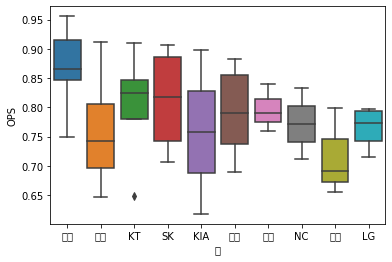

In [45]:
# 팀별 선수 ops 분포

import seaborn as sns

sns.boxplot(data = player_stat, x = '팀', y = 'OPS')

In [46]:
# 아래 코드는 seaborn, matplotlib으로 시각화를 진행할때 데이터에 한글이 들어있다면 copy&paste 한 뒤 사용하시면 됩니다. 
# 이미지 상에 들어있는 한글을 표시하기 위한 한글 폰트를 지정하고, 필요한 라이브러리를 불러들이는 코드입니다. 
import matplotlib
from matplotlib import font_manager, rc
import platform
import matplotlib.pyplot as plt
import seaborn as sns

# 이미지 한글 표시 설정
if platform.system() == 'Windows':  # 윈도우인 경우 맑은고딕
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    # Mac 인 경우 애플고딕
    rc('font', family='AppleGothic')

#그래프에서 마이너스 기호가 표시되도록 하는 설정입니다.
matplotlib.rcParams['axes.unicode_minus'] = False   

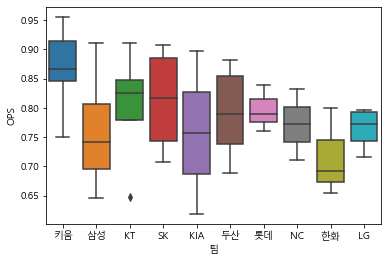

In [48]:
# 팀별 선수 ops 분포
sns.boxplot(data = player_stat, x = '팀', y = 'OPS')

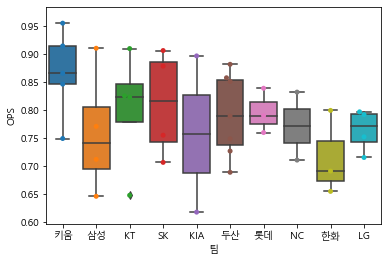

In [51]:
sns.swarmplot(data = player_stat, x = '팀', y = 'OPS')
sns.boxplot(data = player_stat, x = '팀', y = 'OPS')

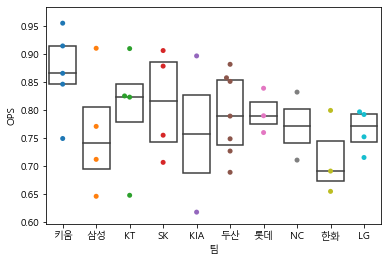

In [58]:
# boxplot 간단하게
sns.swarmplot(data = player_stat, x = '팀', y = 'OPS')
sns.boxplot(data = player_stat, x = '팀', y = 'OPS',
           showcaps= False, # 상단 가로선 지우기
           whiskerprops = {'linewidth' : 0},# 박스상단 선 지우기
           showfliers = False, # 아웃라이어 제거
           boxprops = {'facecolor' : 'None'}) # boxplot 색 제거

In [60]:
file = './data/player_stat.csv'

player_stat.to_csv(file, encoding = 'cp949', index = False)